<h1 align='center'> 영상처리 프로그래밍 실습 11</h1>

<h6 align='right'> 2025. 6. 10. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;&nbsp;          학번:    &nbsp;&nbsp;         학과(전공):
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)


* 제출 마감: 6월 16일 (월) 오후 10:00까지 최종본을 SmartLEAD제출



In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.10.0
NumPy version 1.26.4


### 문제 1.

MNIST handwritten digits dataset를 이용해서 숫자 인식 프로그램을 만들려고 한다.

### 1.1

아래 URL에서 mnist_784.arff 파일을 다운로드하라.

https://www.openml.org/search?type=data&sort=runs&id=554&status=active

(Smartlead에서도 다운로드할 수 있다.)


#### 1.2

다음 셀에 있는 프로그램을 실행하라.

In [8]:
import cv2
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

#### 1.3
arff.loadarff 함수를 이용하여 mnist_784.arff 파일을 읽은 후에, 이를 DataFrame으로 변환하라.

```
# 파일 경로 예시
file_path = "mnist_784.arff"

# 파일 읽기
data, meta = arff.loadarff(file_path)

# DataFrame으로 변환
df = pd.DataFrame(  # ← 여기에 적절한 변수 전달
    ...
)
```

#### 1.4
이 DataFrame의 shape을 구하라.

힌트: .shape 속성 사용

#### 1.5
이 DataFrame의 column의 개수를 구하고, 각 column이 무엇을 의미하는지 알아보자.

힌트 코드:
```
print(df.columns[:-1])  # 픽셀 확인
print(len(df.columns))  # 전체 column 수 확인
```

#### 의미 설명하기

#### 1.6
이 DataFrame의 첫 번째 row를 시각화하라.

힌트 코드:
```
first_row = df.iloc[0]

# label 추출
label = first_row[-1]

# 이미지 배열 변환
img = np.array(first_row[:-1], dtype=np.float32).reshape(28, 28)

# 시각화
plt.imshow(.......)
plt.title(f"Label: {label.decode()}")
....
....
```

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2504\3620363451.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = first_row[-1].decode()  # decode: byte → string


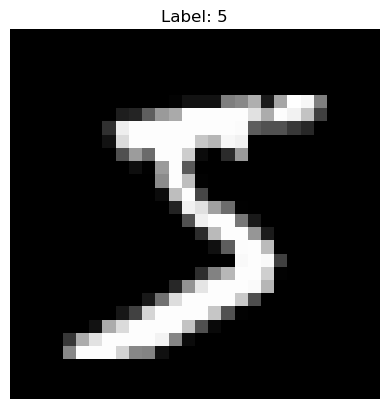

## 문제 2: 데이터 전처리

### 2.1.
class 값의 고유값(unique values)과 그 개수를 출력하라.

힌트 코드:
```
print(df['class'].unique())
print(df['class'].value_counts())
```

### 2.2
class 열을 숫자형으로 변환하라.

힌트: class는 현재 문자열(byte type)로 되어 있음. 이를 정수로 바꿔야 함.

힌트 코드:
```
# 문자열을 숫자(int)로 변환
df['class'] = df['class'].apply(lambda x: int(x.decode()))
```


### 2.3 데이터와 레이블을 각각 X, y로 나누어라.

힌트 코드:
```
X = df.iloc[:, :-1].values  # 픽셀 값
y = df.iloc[:, -1].values   # class 레이블

```

### 2.4
문제: X의 값을 0~1 범위로 정규화하라.

힌트 코드:
```
X = X / 255.0
```

## 문제 3. KNN 분류기 만들기

### 3.1.데이터를 학습용과 테스트용으로 나누어라. (학습: 80%, 테스트: 20%)

힌트 코드:
```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

```

### 3.2

문제: KNN 분류기를 만들고 학습하라. (k=3)

힌트 코드:
```
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

```

### 3.3
문제: 테스트 데이터에 대해 정확도를 출력하라.

힌트 코드:
```
accuracy = knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)
```

### 3.4 
Confusion matrix를 구하고 heatmap으로 시각화하라.

힌트 코드:
```
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

```

## 문제 4. KNN 성능 분석

### 4.1
k 값을 1~15까지 변경하면서 정확도를 구하고 그래프로 표시하라.

힌트 코드:
```
accuracy_list = []

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracy_list.append(acc)

plt.plot(range(1, 16), accuracy_list, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.show()

```

### 4.2
가장 성능이 좋았던 k 값을 선택하고 이유를 적어보자.

힌트: 위 그래프에서 최고점을 가진 k를 찾고, 과적합/과소적합과 관련지어 서술
